In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import seaborn as sns
sns.set_style('dark')

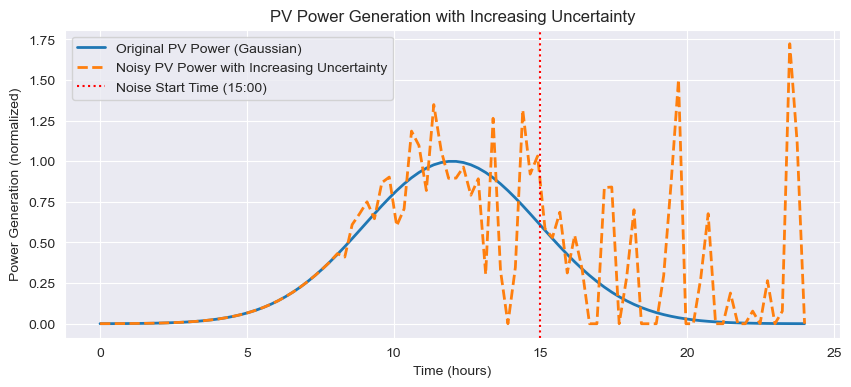

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    """
    Generate a Gaussian time series representing PV power generation.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.

    Returns:
        np.ndarray: Time series with 15-minute resolution for 24 hours.
    """
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add noise and increasing uncertainty to a time series
def add_uncertainty(time_series, start_time, base_noise_std):
    """
    Add noise with increasing uncertainty to the time series from the given time to the end.

    Parameters:
        time_series (np.ndarray): The original PV power generation time series.
        start_time (float): The starting time for adding noise.
        base_noise_std (float): Base standard deviation of the noise.

    Returns:
        np.ndarray: Modified time series with added noise.
    """
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)

    for i in range(start_index, len(time_series)):
        time_distance = time_steps[i] - start_time
        current_noise_std = base_noise_std * (1 + time_distance)  # Noise grows with time
        noise = np.random.normal(0, current_noise_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)  # Ensure no negative power
    return noisy_series

# Main code
mean, std = 12, 3  # Noon as the peak time, with a 3-hour spread
time_steps, power_series = generate_pv_power(mean, std)

# Add noise from 15:00 (3 PM) onwards with a base standard deviation of 0.05
noisy_series = add_uncertainty(power_series, start_time=8, base_noise_std=0.05)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(time_steps, power_series, label='Original PV Power (Gaussian)', linewidth=2)
plt.plot(time_steps, noisy_series, label='Noisy PV Power with Increasing Uncertainty', linestyle='--', linewidth=2)
plt.axvline(15, color='red', linestyle=':', label='Noise Start Time (15:00)')
plt.title('PV Power Generation with Increasing Uncertainty')
plt.xlabel('Time (hours)')
plt.ylabel('Power Generation (normalized)')
plt.legend()
plt.grid()
plt.show()


## proportional to power value

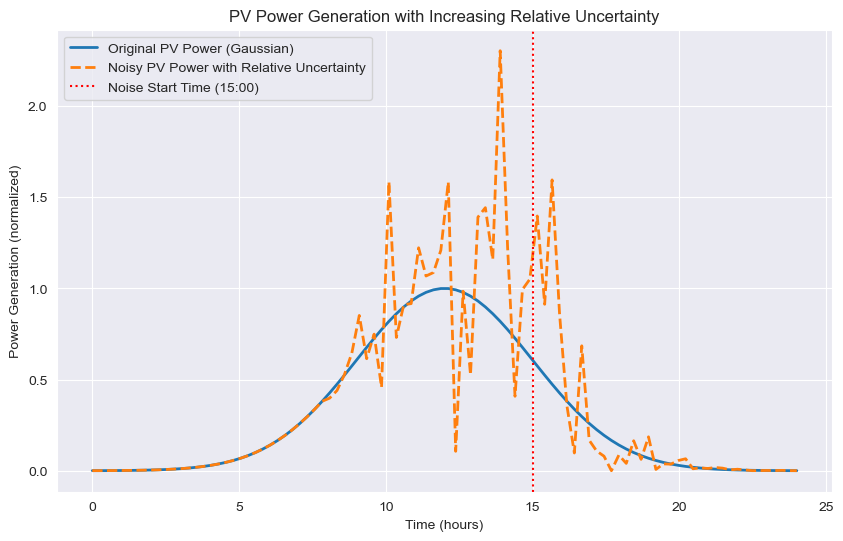

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    """
    Generate a Gaussian time series representing PV power generation.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.

    Returns:
        np.ndarray: Time series with 15-minute resolution for 24 hours.
    """
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add noise with increasing uncertainty to a time series
def add_uncertainty(time_series, start_time, base_noise_std):
    """
    Add noise with increasing uncertainty to the time series from the given time to the end,
    scaled by the power value at each time step.

    Parameters:
        time_series (np.ndarray): The original PV power generation time series.
        start_time (float): The starting time for adding noise.
        base_noise_std (float): Base standard deviation of the noise.

    Returns:
        np.ndarray: Modified time series with added noise.
    """
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)

    for i in range(start_index, len(time_series)):
        time_distance = time_steps[i] - start_time
        relative_std = base_noise_std * (1 + time_distance) * noisy_series[i]  # Noise scales with power value
        noise = np.random.normal(0, relative_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)  # Ensure no negative power
    return noisy_series

# Main code
mean, std = 12, 3  # Noon as the peak time, with a 3-hour spread
time_steps, power_series = generate_pv_power(mean, std)

# Add noise from 15:00 (3 PM) onwards with a base standard deviation of 0.05
noisy_series = add_uncertainty(power_series, start_time=8, base_noise_std=0.1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_steps, power_series, label='Original PV Power (Gaussian)', linewidth=2)
plt.plot(time_steps, noisy_series, label='Noisy PV Power with Relative Uncertainty', linestyle='--', linewidth=2)
plt.axvline(15, color='red', linestyle=':', label='Noise Start Time (15:00)')
plt.title('PV Power Generation with Increasing Relative Uncertainty')
plt.xlabel('Time (hours)')
plt.ylabel('Power Generation (normalized)')
plt.legend()
plt.grid()
plt.show()


## 3d plot

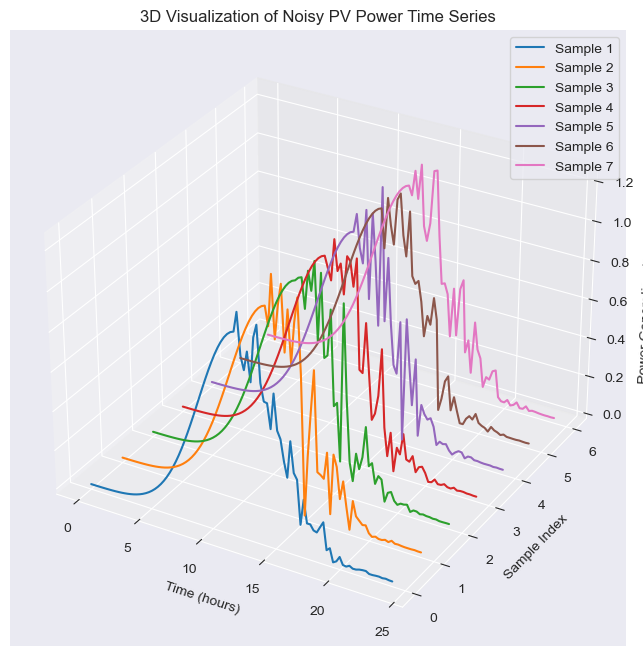

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add noise with increasing uncertainty to a time series
def add_uncertainty(time_series, start_time, base_noise_std):
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)

    for i in range(start_index, len(time_series)):
        time_distance = time_steps[i] - start_time
        relative_std = base_noise_std * (1 + time_distance) * noisy_series[i]
        noise = np.random.normal(0, relative_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)
    return noisy_series

# Function to plot multiple samples in 3D
def plot_3d_samples(mean, std, start_time, base_noise_std, num_samples=10):
    """
    Plot multiple samples of the noisy PV power time series in 3D.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
        start_time (float): Time from which noise and uncertainty start.
        base_noise_std (float): Base standard deviation of the noise.
        num_samples (int): Number of samples to plot.
    """
    time_steps, power_series = generate_pv_power(mean, std)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(num_samples):
        noisy_series = add_uncertainty(power_series, start_time, base_noise_std)
        ax.plot(
            time_steps, [i] * len(time_steps), noisy_series, label=f'Sample {i+1}'
        )  # Offset samples along y-axis

    ax.set_title("3D Visualization of Noisy PV Power Time Series")
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("Sample Index")
    ax.set_zlabel("Power Generation (normalized)")
    plt.legend()
    plt.show()

# Main code
plot_3d_samples(mean=12, std=3, start_time=12, base_noise_std=0.1, num_samples=7)


## 2d plot

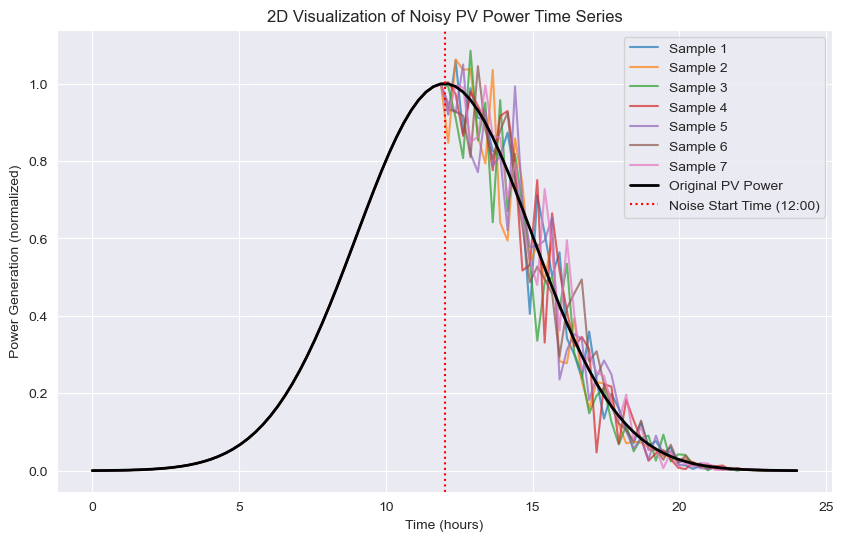

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add noise with increasing uncertainty to a time series
def add_uncertainty(time_series, start_time, base_noise_std):
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)

    for i in range(start_index, len(time_series)):
        time_distance = time_steps[i] - start_time
        relative_std = base_noise_std * (1 + time_distance) * noisy_series[i]
        noise = np.random.normal(0, relative_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)
    return noisy_series

# Function to plot multiple samples in 2D
def plot_2d_samples(mean, std, start_time, base_noise_std, num_samples=5):
    """
    Plot multiple samples of the noisy PV power time series in 2D.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
        start_time (float): Time from which noise and uncertainty start.
        base_noise_std (float): Base standard deviation of the noise.
        num_samples (int): Number of samples to plot.
    """
    time_steps, power_series = generate_pv_power(mean, std)
    plt.figure(figsize=(10, 6))

    for i in range(num_samples):
        noisy_series = add_uncertainty(power_series, start_time, base_noise_std)
        plt.plot(time_steps, noisy_series, label=f'Sample {i+1}', alpha=0.7)

    plt.plot(time_steps, power_series, label='Original PV Power', color='black', linewidth=2)
    plt.axvline(start_time, color='red', linestyle=':', label=f'Noise Start Time ({start_time}:00)')
    plt.title("2D Visualization of Noisy PV Power Time Series")
    plt.xlabel("Time (hours)")
    plt.ylabel("Power Generation (normalized)")
    plt.legend()
    plt.grid()
    plt.show()

# Main code
plot_2d_samples(mean=12, std=3, start_time=12, base_noise_std=0.05, num_samples=7)


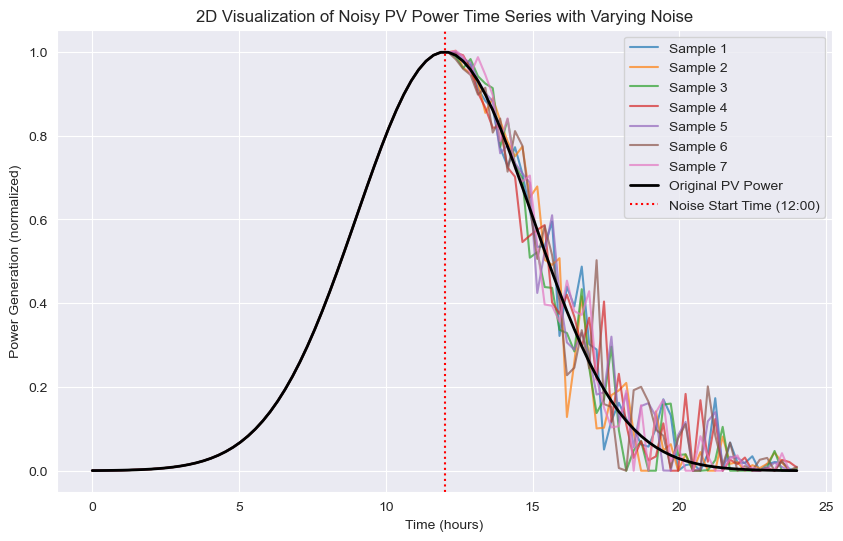

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add noise with varying intensity and proportional to power
def add_uncertainty(time_series, start_time, base_noise_std):
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)
    total_horizon = len(time_series) - start_index

    for i in range(start_index, len(time_series)):
        time_distance = (i - start_index) / total_horizon  # Normalize distance to [0, 1]
        relative_std = base_noise_std * np.sin(np.pi * time_distance)  # Sinusoidal scale
        # relative_std = noise_scale * noisy_series[i]/5  # Scale noise by power value
        noise = np.random.normal(0, relative_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)  # Ensure no negative power
    return noisy_series

# Function to plot multiple samples in 2D
def plot_2d_samples(mean, std, start_time, base_noise_std, num_samples=5):
    """
    Plot multiple samples of the noisy PV power time series in 2D.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
        start_time (float): Time from which noise and uncertainty start.
        base_noise_std (float): Base standard deviation of the noise.
        num_samples (int): Number of samples to plot.
    """
    time_steps, power_series = generate_pv_power(mean, std)
    plt.figure(figsize=(10, 6))

    for i in range(num_samples):
        noisy_series = add_uncertainty(power_series, start_time, base_noise_std)
        plt.plot(time_steps, noisy_series, label=f'Sample {i+1}', alpha=0.7)

    plt.plot(time_steps, power_series, label='Original PV Power', color='black', linewidth=2)
    plt.axvline(start_time, color='red', linestyle=':', label=f'Noise Start Time ({start_time}:00)')
    plt.title("2D Visualization of Noisy PV Power Time Series with Varying Noise")
    plt.xlabel("Time (hours)")
    plt.ylabel("Power Generation (normalized)")
    plt.legend()
    plt.grid()
    plt.show()

# Main code
plot_2d_samples(mean=12, std=3, start_time=12, base_noise_std=0.1, num_samples=7)


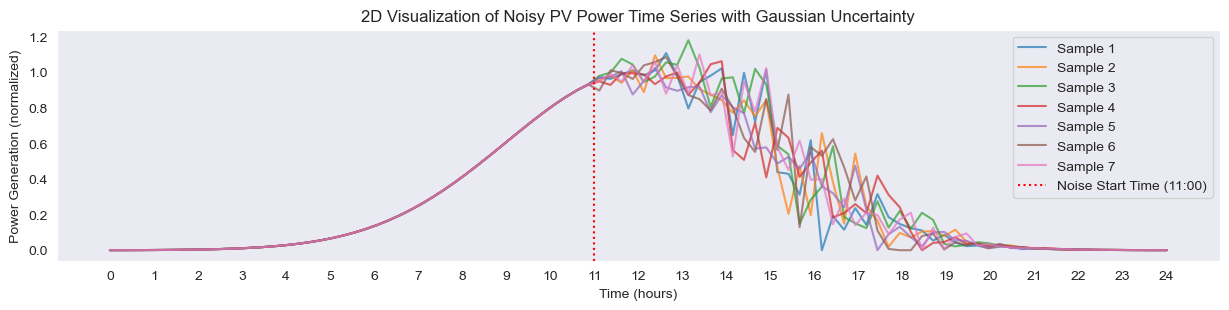

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian time series
def generate_pv_power(mean, std):
    time_steps = np.linspace(0, 24, 24 * 4)  # 15-minute resolution
    power = np.exp(-0.5 * ((time_steps - mean) / std)**2)  # Gaussian curve
    return time_steps, power

# Function to add Gaussian noise with varying intensity and proportional to power
def add_uncertainty(time_series, start_time, base_noise_std):
    time_steps = np.linspace(0, 24, len(time_series))
    noisy_series = time_series.copy()
    start_index = np.searchsorted(time_steps, start_time)
    total_horizon = len(time_series) - start_index

    # Define the Gaussian uncertainty function
    for i in range(start_index, len(time_series)):
        time_distance = (i - start_index) / total_horizon  # Normalize distance to [0, 1]
        # Gaussian function for uncertainty, centered at the midpoint of the horizon
        uncertainty_scale = np.exp(-0.5 * ((time_distance - 0.5) ** 2) / (0.2 ** 2))  # Narrow Gaussian
        noise_scale = base_noise_std * uncertainty_scale  # Scale noise by the Gaussian function
        relative_std = noise_scale * noisy_series[i]  # Scale by power value
        noise = np.random.normal(0, relative_std)
        noisy_series[i] += noise

    noisy_series[start_index:] = np.clip(noisy_series[start_index:], 0, None)  # Ensure no negative power
    return noisy_series

# Function to plot multiple samples in 2D
def plot_2d_samples(mean, std, start_time, base_noise_std, num_samples=5):
    """
    Plot multiple samples of the noisy PV power time series in 2D.

    Parameters:
        mean (float): Mean of the Gaussian distribution.
        std (float): Standard deviation of the Gaussian distribution.
        start_time (float): Time from which noise and uncertainty start.
        base_noise_std (float): Base standard deviation of the noise.
        num_samples (int): Number of samples to plot.
    """
    time_steps, power_series = generate_pv_power(mean, std)
    plt.figure(figsize=(15, 3))

    for i in range(num_samples):
        noisy_series = add_uncertainty(power_series, start_time, base_noise_std)
        plt.plot(time_steps, noisy_series, label=f'Sample {i+1}', alpha=0.7)

    # plt.plot(time_steps, power_series, label='Original PV Power', color='black', linewidth=2)
    plt.axvline(start_time, color='red', linestyle=':', label=f'Noise Start Time ({start_time}:00)')

    # Set x-axis ticks
    hours_ticks = np.arange(0, 25, 1)
    plt.xticks(hours_ticks, minor=False)


    plt.title("2D Visualization of Noisy PV Power Time Series with Gaussian Uncertainty")
    plt.xlabel("Time (hours)")
    plt.ylabel("Power Generation (normalized)")
    plt.legend()
    # plt.grid()
    plt.show()

# Main code
plot_2d_samples(mean=12, std=3, start_time=11, base_noise_std=0.5, num_samples=7)
